# بسم الله الرحمن الرحيم

# Experiment Data Visualization

In [1]:
from matplotlib import pyplot as plt

%matplotlib ipympl

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
# 用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['figure.autolayout'] = True
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
import numpy as np
import pandas as pd
import pylatex
pd.set_option('precision', 2)

from parse_data import *

In [3]:
benchmark_max_stack_usages = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_max_stack_usages', 'stack_size'),
    'max_stack_usage',
    True
)

benchmark_instruction_counts = parse_profile_data_in_directory_to_dataframe(
    parse_benchmark_instruction_counts_directory('benchmark_instruction_counts'),
    'instruction_count',
    True
)

benchmark_write_instruction_counts = parse_profile_data_in_directory_to_dataframe(
    parse_benchmark_write_instruction_counts_directory('benchmark_instruction_counts'),
    'instruction_count',
    True
)

benchmark_writes_on_hottest_stack_addresses = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_writes_on_hottest_stack_addresses', 'writes'),
    'writes_on_hottest_stack_address',
    True
)

benchmark_cache_hit_ratios = parse_profile_data_in_directory_to_dataframe(
    parse_benchmark_cache_simulations_directory('benchmark_cache_simulations'),
    'cache_hit_ratio',
    False
)

max_number_of_stack_frames_on_a_stack_address = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('max_number_of_stack_frames_on_a_stack_address', 'number_of_stack_frames'),
    'max_number_of_stack_frames_on_a_stack_address',
    True
)

writes_on_hottest_address_in_stack_frames = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('writes_on_hottest_address_in_stack_frames', 'writes'),
    'writes_on_hottest_address_in_stack_frames',
    True
)

In [4]:
benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage
0,new_loop2recursion-loop_iterations-4,dijkstra_small,2.20e+04
1,new_loop2recursion-loop_iterations-4,bf,1.04e+05
2,new_loop2recursion-loop_iterations-4,bitcnts,3.00e+06
3,new_loop2recursion-loop_iterations-4,patricia,1.77e+05
4,new_loop2recursion-loop_iterations-4,fft,9.86e+04
...,...,...,...
163,new_loop2recursion-loop_iterations-2,average,5.42e+06
164,new_loop2recursion-loop_iterations-8,average,1.82e+06
165,new_loop2recursion-recursion_depth_limit-32,average,6.27e+05
166,new_loop2recursion-loop_iterations-32,average,9.21e+05


In [5]:
benchmark_write_instruction_counts

,executable_type,benchmark,instruction_count
0,new_loop2recursion-loop_iterations-4,dijkstra_small,4.54e+07
1,new_loop2recursion-loop_iterations-4,bf,1.55e+07
2,new_loop2recursion-loop_iterations-4,bitcnts,5.57e+07
3,new_loop2recursion-loop_iterations-4,patricia,1.19e+07
4,new_loop2recursion-loop_iterations-4,fft,5.37e+06
...,...,...,...
163,new_loop2recursion-loop_iterations-2,average,2.46e+07
164,new_loop2recursion-loop_iterations-8,average,2.12e+07
165,new_loop2recursion-recursion_depth_limit-32,average,1.39e+07
166,new_loop2recursion-loop_iterations-32,average,2.03e+07


In [6]:
benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address
0,new_loop2recursion-loop_iterations-4,dijkstra_small,50477.00
1,new_loop2recursion-loop_iterations-4,bf,155915.00
2,new_loop2recursion-loop_iterations-4,bitcnts,333.00
3,new_loop2recursion-loop_iterations-4,patricia,21780.00
4,new_loop2recursion-loop_iterations-4,fft,2231.00
...,...,...,...
163,new_loop2recursion-loop_iterations-2,average,135314.00
164,new_loop2recursion-loop_iterations-8,average,164266.62
165,new_loop2recursion-recursion_depth_limit-32,average,161817.38
166,new_loop2recursion-loop_iterations-32,average,306051.08


In [7]:
assert ((benchmark_max_stack_usages.index == benchmark_instruction_counts.index) & (benchmark_instruction_counts.index == benchmark_writes_on_hottest_stack_addresses.index)).all()


benchmark_normalized_lifetimes = pd.DataFrame({
    'executable_type': benchmark_instruction_counts['executable_type'],
    'benchmark': benchmark_instruction_counts['benchmark'],
    'normalized_lifetime': benchmark_write_instruction_counts['instruction_count'] / (benchmark_max_stack_usages['max_stack_usage'] * benchmark_writes_on_hottest_stack_addresses['writes_on_hottest_stack_address'])
})

In [8]:
benchmark_normalized_lifetimes

,executable_type,benchmark,normalized_lifetime
0,new_loop2recursion-loop_iterations-4,dijkstra_small,4.08e-02
1,new_loop2recursion-loop_iterations-4,bf,9.55e-04
2,new_loop2recursion-loop_iterations-4,bitcnts,5.58e-02
3,new_loop2recursion-loop_iterations-4,patricia,3.09e-03
4,new_loop2recursion-loop_iterations-4,fft,2.44e-02
...,...,...,...
163,new_loop2recursion-loop_iterations-2,average,3.36e-05
164,new_loop2recursion-loop_iterations-8,average,7.08e-05
165,new_loop2recursion-recursion_depth_limit-32,average,1.37e-04
166,new_loop2recursion-loop_iterations-32,average,7.21e-05


In [9]:
def calculate_increases(dataframe, from_executable_type, to_executable_types, data_column):
    extracted_and_sorted_dataframe = dataframe[dataframe['executable_type'].isin({from_executable_type, *to_executable_types})].sort_values(by=['benchmark', 'executable_type'])
    from_executable_type_data = extracted_and_sorted_dataframe[extracted_and_sorted_dataframe['executable_type'] == from_executable_type][data_column].values
    
    to_executable_types_data = {
        to_executable_type: extracted_and_sorted_dataframe[extracted_and_sorted_dataframe['executable_type'] == to_executable_type][data_column].values
        for to_executable_type in to_executable_types
    }
    
    increases_data = {
        to_executable_type: (to_executable_types_data[to_executable_type] - from_executable_type_data) / from_executable_type_data
        for to_executable_type in to_executable_types
    }
    
    dataframe_data = {
        'benchmark': extracted_and_sorted_dataframe[extracted_and_sorted_dataframe['executable_type'] == from_executable_type]['benchmark'].values,
        from_executable_type: from_executable_type_data
    }
    
    for to_executable_type in to_executable_types:
        dataframe_data[to_executable_type] = to_executable_types_data[to_executable_type]
        dataframe_data[f'{to_executable_type}_increase'] = increases_data[to_executable_type]
    
    
    return pd.DataFrame(
        dataframe_data
    )

In [10]:
# 从DataFrame中自动绘制分组条形统计图
# 参数说明：
# dataframe：DataFrame对象
# data_column：条形呈现DataFrame对象哪一列的数据
# group_bars_by：根据DataFrame对象的哪一列给条形分组
# label_bars_by：根据DataFrame对象的哪一列给条形打标签
# title：标题
# label_name_replacer：标题名替换函数
# kwargs：其他传递给axes.bar()，用于绘制条形统计图的参数（如log=True）
def grouped_bar_chart_from_dataframe(dataframe, data_column, group_bars_by, label_bars_by, title='', label_name_replacer=lambda x: x, **kwargs):
    # 所有的组
    groups=dataframe[group_bars_by].unique()
    # 所有的标签
    labels=dataframe[label_bars_by].unique()
    
    # 各组标注的位置
    positions_of_group_captions=np.arange(len(groups))
    
    # 标签的数量
    number_of_labels=len(labels)
    
    # 条形的宽度
    bar_width = 1 / (number_of_labels + 1)
    
    # 得到用户绘图的figure和axes对象
    figure, axes=plt.subplots()
    
    # 各组第一个条形的位置
    positions_of_first_bar_in_each_group=positions_of_group_captions - ((number_of_labels - 1) * bar_width / 2)
    
    # 遍历各个标签
    for (i, label) in enumerate(labels):
        # 得到该标签对应的数据，每组一个数据
        data_in_each_group = dataframe[dataframe[label_bars_by] == label][data_column]
        
        # 计算该标签对应的数据画到条形统计图上的各条形的位置，每组一个条形
        positions_of_bars_in_each_group=positions_of_first_bar_in_each_group + i * bar_width
        
        # 以条形的方式，绘制该标签对应的数据
        new_label = label_name_replacer(label)
        bar = axes.bar(positions_of_bars_in_each_group, data_in_each_group, bar_width, label=new_label, **kwargs)
    
    # 设置显示各组标注的位置
    axes.set_xticks(positions_of_group_captions)
    
    # 设置在那些位置现实各组标注
    axes.set_xticklabels(groups)
    
    # 设置x轴标签
    axes.set_xlabel(label_name_replacer(group_bars_by))
    
    # 设置y轴标签
    axes.set_ylabel(label_name_replacer(data_column))
    
    # 设置标题
    axes.set_title(title)
    
    # 设置在图例中显示各标签
    axes.legend()
    
    return figure, axes

In [11]:
def grouped_box_chart_from_dataframe(dataframe, data_column, group_bars_by, title='', group_name_replacer=lambda x: x, **kwargs):
    # 所有的组
    groups=dataframe[group_bars_by].unique()
    
    # 各组的数据
    group_data = [dataframe[dataframe[group_bars_by] == group][data_column] for group in groups]
    
    # 重命名各组
    groups = [group_name_replacer(group) for group in groups]
    
    # 得到用户绘图的figure和axes对象
    figure, axes=plt.subplots()
    
    # 绘制箱形图
    axes.boxplot(group_data, labels=groups, **kwargs)
    
    # 设置标题
    axes.set_title(title)
    
    return figure, axes

In [12]:
def grouped_boxplot_from_dataframe_horizontal(dataframe, groups, title='', group_name_replacer=lambda x: x, **kwargs):
    # 各组的数据
    group_data = [dataframe[group] for group in groups]
    
    # 各组标注的位置
    positions_of_group_captions=np.arange(len(groups)) + 1
    
    # 重命名各组
    groups = [group_name_replacer(group) for group in groups]
    
    # 得到用户绘图的figuviolinplotviolinplotre和axes对象
    figure, axes=plt.subplots()
    
    # 绘制箱形图
    axes.boxplot(group_data, **kwargs)
    
    axes.set_xticks(positions_of_group_captions, labels=groups)
    
    # 设置标题
    axes.set_title(title)
    
    return figure, axes

In [13]:
def grouped_violinplot_from_dataframe_horizontal(dataframe, groups, title='', group_name_replacer=lambda x: x, **kwargs):
    # 各组的数据
    group_data = [dataframe[group] for group in groups]
    
    # 各组标注的位置
    positions_of_group_captions=np.arange(len(groups)) + 1
    
    # 重命名各组
    groups = [group_name_replacer(group) for group in groups]
    
    # 得到用户绘图的figuviolinplotviolinplotre和axes对象
    figure, axes=plt.subplots()
    
    # 绘制箱形图
    axes.violinplot(group_data, **kwargs)
    
    axes.set_xticks(positions_of_group_captions, labels=groups)
    
    # 设置标题
    axes.set_title(title)
    
    return figure, axes

In [14]:
english_and_chinese_labels = {
    'loop2recursion': '原版循环转递归',
    'new_loop2recursion': '改进的循环转递归',
    'max_stack_usage': '栈区内存的使用量',
    'benchmark': '测试用例',
    'instruction_count': '指令数',
    'writes_on_hottest_stack_address': '栈上最热内存地址的写次数',
    'max_number_of_stack_frames_on_a_stack_address': '栈上一个内存地址上方栈帧数的最大值',
    'new_loop2recursion_increase': '改进的循环转递归增长'
}

In [15]:
def replace_label(label):
    if label in english_and_chinese_labels:
        return english_and_chinese_labels[label]
    else:
        return label

# 我们的方法与原版循环转递归的对比

## 损耗均衡的高效性

### 栈区内存的使用量

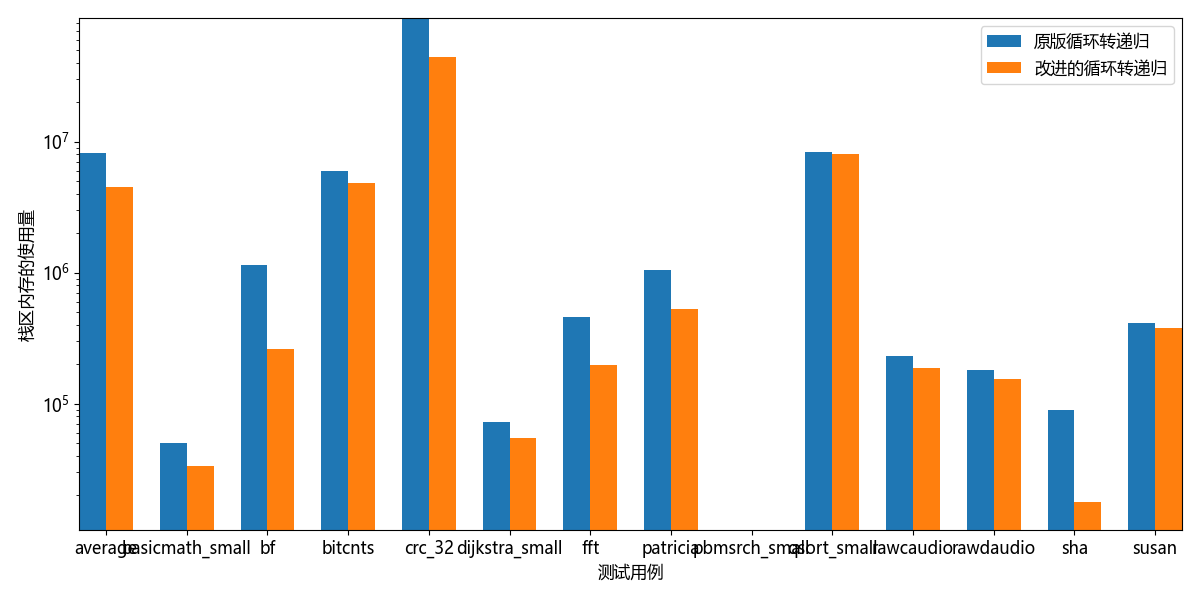

In [16]:
我们的方法与原版循环转递归的对比栈区内存的使用量图, _ = grouped_bar_chart_from_dataframe(
    benchmark_max_stack_usages[benchmark_max_stack_usages['executable_type'].isin({'loop2recursion','new_loop2recursion'})].sort_values(by=['benchmark', 'executable_type']),
    'max_stack_usage',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [17]:
我们的方法与原版循环转递归的对比栈区内存的使用量表 = calculate_increases(
    benchmark_max_stack_usages, 'loop2recursion', ['new_loop2recursion'], 'max_stack_usage'
).rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比栈区内存的使用量表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,8.13e+06,4.49e+06,-4.47e-01
1,basicmath_small,4.98e+04,3.38e+04,-3.22e-01
2,bf,1.14e+06,2.62e+05,-7.71e-01
3,bitcnts,6.00e+06,4.80e+06,-2.00e-01
4,crc_32,8.76e+07,4.38e+07,-5.00e-01
5,dijkstra_small,7.27e+04,5.47e+04,-2.48e-01
6,fft,4.59e+05,1.97e+05,-5.71e-01
7,patricia,1.05e+06,5.26e+05,-4.99e-01
8,pbmsrch_small,1.08e+04,1.08e+04,1.48e-03
9,qsort_small,8.32e+06,8.00e+06,-3.85e-02


In [18]:
我们的方法与原版循环转递归的对比栈区内存的使用量表Latex = 我们的方法与原版循环转递归的对比栈区内存的使用量表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='原版循环转递归和我们的循环转递归栈区内存的使用量表',
    label='原版循环转递归和我们的循环转递归栈区内存的使用量表',
    index=False
)
print(我们的方法与原版循环转递归的对比栈区内存的使用量表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归栈区内存的使用量表}
\label{原版循环转递归和我们的循环转递归栈区内存的使用量表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average & 8.13e+06 &  4.49e+06 &    -44.68\% \\
basicmath\_small & 4.98e+04 &  3.38e+04 &    -32.16\% \\
             bf & 1.14e+06 &  2.62e+05 &    -77.10\% \\
        bitcnts & 6.00e+06 &  4.80e+06 &    -19.99\% \\
         crc\_32 & 8.76e+07 &  4.38e+07 &    -50.00\% \\
 dijkstra\_small & 7.27e+04 &  5.47e+04 &    -24.79\% \\
            fft & 4.59e+05 &  1.97e+05 &    -57.08\% \\
       patricia & 1.05e+06 &  5.26e+05 &    -49.85\% \\
  pbmsrch\_small & 1.08e+04 &  1.08e+04 &      0.15\% \\
    qsort\_small & 8.32e+06 &  8.00e+06 &     -3.85\% \\
      rawcaudio & 2.30e+05 &  1.87e+05 &    -18.69\% \\
      rawdaudio & 1.82e+05 &  1.55e+05 &    -14.82\% \\
            sha & 9.01e+04 &  1.78e+04 &    -80.24\% \\
          susan & 4.17e+05 &  3.81e+05 &     -8.54\% \\
\bottomrule
\end{tabu

In [19]:
我们的方法与原版循环转递归的对比栈区内存的使用量平均下降程度, *_ = 我们的方法与原版循环转递归的对比栈区内存的使用量表[
    我们的方法与原版循环转递归的对比栈区内存的使用量表['测试用例'] == 'average'
]['改进的循环转递归增长']
我们的方法与原版循环转递归的对比栈区内存的使用量平均下降程度

-0.4468435373078084

In [20]:
# !experimental_code/print_call_frequencies --experiment-root "$(pwd)" --benchmark-type "new_loop2recursion" --benchmark "bf"

In [21]:
# !experimental_code/print_call_frequencies --experiment-root "$(pwd)" --benchmark-type "loop2recursion" --benchmark "bf"

In [22]:
# !gdb -batch -ex "file benchmark_executables/new_loop2recursion/bf" -ex 'disass BF_cfb64_encrypt$1' | head

In [23]:
# !gdb -batch -ex "file benchmark_executables/loop2recursion/bf" -ex "disass 'BF_cfb64_encrypt.loop.while.body.recur'" | head

In [24]:
# !gdb -batch -ex "file benchmark_executables/loop2recursion/bf" -ex "disass 'main.loop.for.body.recur'" | head

In [25]:
# !gdb -batch -ex "file benchmark_executables/new_loop2recursion/bf" -ex 'disass main$0$0' | head

### 指令数

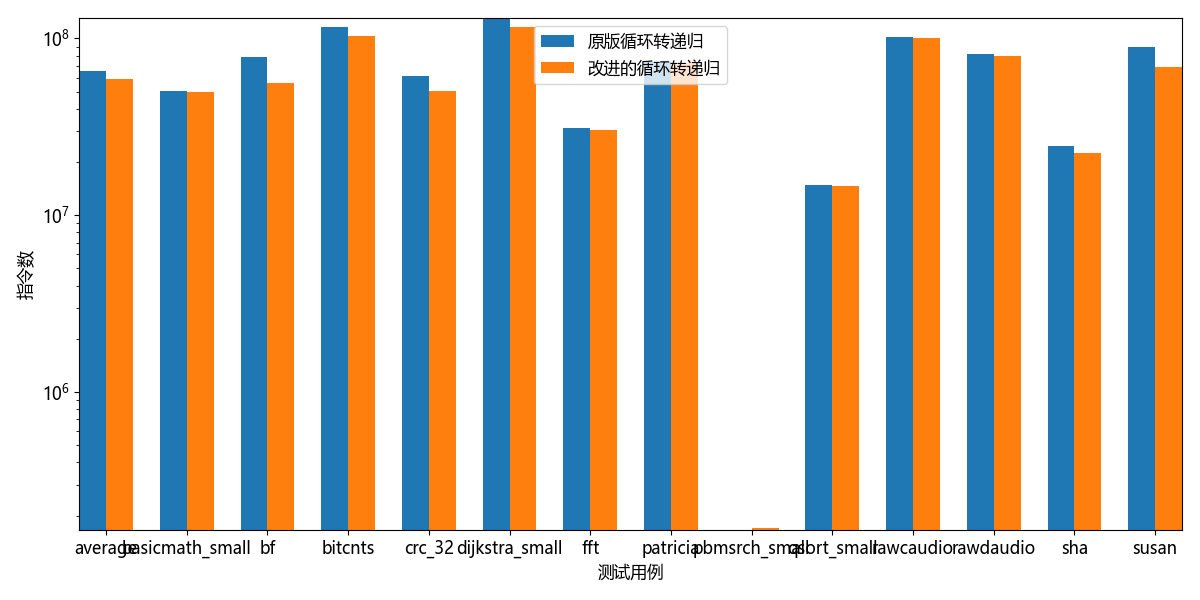

In [26]:
我们的方法与原版循环转递归的对比指令数图, _ = grouped_bar_chart_from_dataframe(
    benchmark_instruction_counts[benchmark_instruction_counts['executable_type'].isin({'loop2recursion','new_loop2recursion'})].sort_values(by=['benchmark', 'executable_type']),
    'instruction_count',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [27]:
我们的方法与原版循环转递归的对比指令数表 = calculate_increases(
    benchmark_instruction_counts, 'loop2recursion', ['new_loop2recursion'], 'instruction_count'
).rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比指令数表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,6.57e+07,5.90e+07,-1.02e-01
1,basicmath_small,5.02e+07,4.97e+07,-8.89e-03
2,bf,7.85e+07,5.62e+07,-2.84e-01
3,bitcnts,1.15e+08,1.04e+08,-1.03e-01
4,crc_32,6.17e+07,5.07e+07,-1.78e-01
5,dijkstra_small,1.30e+08,1.17e+08,-1.05e-01
6,fft,3.11e+07,3.05e+07,-1.93e-02
7,patricia,7.33e+07,7.24e+07,-1.17e-02
8,pbmsrch_small,1.65e+05,1.70e+05,2.80e-02
9,qsort_small,1.48e+07,1.46e+07,-1.08e-02


In [28]:
我们的方法与原版循环转递归的对比指令数表Latex = 我们的方法与原版循环转递归的对比指令数表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='原版循环转递归和我们的循环转递归指令数表',
    label='原版循环转递归和我们的循环转递归指令数表',
    index=False
)
print(我们的方法与原版循环转递归的对比指令数表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归指令数表}
\label{原版循环转递归和我们的循环转递归指令数表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average & 6.57e+07 &  5.90e+07 &    -10.20\% \\
basicmath\_small & 5.02e+07 &  4.97e+07 &     -0.89\% \\
             bf & 7.85e+07 &  5.62e+07 &    -28.45\% \\
        bitcnts & 1.15e+08 &  1.04e+08 &    -10.26\% \\
         crc\_32 & 6.17e+07 &  5.07e+07 &    -17.75\% \\
 dijkstra\_small & 1.30e+08 &  1.17e+08 &    -10.53\% \\
            fft & 3.11e+07 &  3.05e+07 &     -1.93\% \\
       patricia & 7.33e+07 &  7.24e+07 &     -1.17\% \\
  pbmsrch\_small & 1.65e+05 &  1.70e+05 &      2.80\% \\
    qsort\_small & 1.48e+07 &  1.46e+07 &     -1.08\% \\
      rawcaudio & 1.02e+08 &  1.01e+08 &     -1.35\% \\
      rawdaudio & 8.19e+07 &  7.98e+07 &     -2.51\% \\
            sha & 2.47e+07 &  2.26e+07 &     -8.31\% \\
          susan & 8.94e+07 &  6.87e+07 &    -23.15\% \\
\bottomrule
\end{tabular}
\end{

In [29]:
我们的方法与原版循环转递归的对比指令数平均下降程度, *_ = 我们的方法与原版循环转递归的对比指令数表[
    我们的方法与原版循环转递归的对比指令数表['测试用例'] == 'average'
]['改进的循环转递归增长']
我们的方法与原版循环转递归的对比指令数平均下降程度Latex = pylatex.utils.escape_latex('{:,.2%}'.format(我们的方法与原版循环转递归的对比指令数平均下降程度))
我们的方法与原版循环转递归的对比指令数平均下降程度Latex

NoEscape({-}10.20\%)

### 缓存命中率

In [30]:
我们的方法与原版循环转递归的缓存命中率表 = calculate_increases(
    benchmark_cache_hit_ratios, 'loop2recursion', ['new_loop2recursion'], 'cache_hit_ratio'
).rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的缓存命中率表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,basicmath_small,96.13,97.69,1.62e-02
1,bf,79.14,83.65,5.70e-02
2,bitcnts,94.12,93.66,-4.89e-03
3,crc_32,79.12,82.38,4.12e-02
4,dijkstra_small,75.30,74.05,-1.66e-02
5,fft,97.49,98.14,6.67e-03
6,patricia,92.92,93.09,1.83e-03
7,pbmsrch_small,90.47,92.29,2.01e-02
8,qsort_small,93.83,94.24,4.37e-03
9,rawcaudio,78.45,80.21,2.24e-02


In [31]:
我们的方法与原版循环转递归的缓存命中率表Latex = 我们的方法与原版循环转递归的缓存命中率表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='原版循环转递归和我们的循环转递归缓存命中率表',
    label='原版循环转递归和我们的循环转递归缓存命中率表',
    index=False
)
print(我们的方法与原版循环转递归的缓存命中率表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归缓存命中率表}
\label{原版循环转递归和我们的循环转递归缓存命中率表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
basicmath\_small &    96.13 &     97.69 &      1.62\% \\
             bf &    79.14 &     83.65 &      5.70\% \\
        bitcnts &    94.12 &     93.66 &     -0.49\% \\
         crc\_32 &    79.12 &     82.38 &      4.12\% \\
 dijkstra\_small &    75.30 &     74.05 &     -1.66\% \\
            fft &    97.49 &     98.14 &      0.67\% \\
       patricia &    92.92 &     93.09 &      0.18\% \\
  pbmsrch\_small &    90.47 &     92.29 &      2.01\% \\
    qsort\_small &    93.83 &     94.24 &      0.44\% \\
      rawcaudio &    78.45 &     80.21 &      2.24\% \\
      rawdaudio &    77.31 &     77.56 &      0.32\% \\
            sha &    95.96 &     99.24 &      3.42\% \\
          susan &    95.79 &     99.66 &      4.04\% \\
\bottomrule
\end{tabular}
\end{table}



## 损耗均衡的有效性

### 栈上最热内存地址的写次数

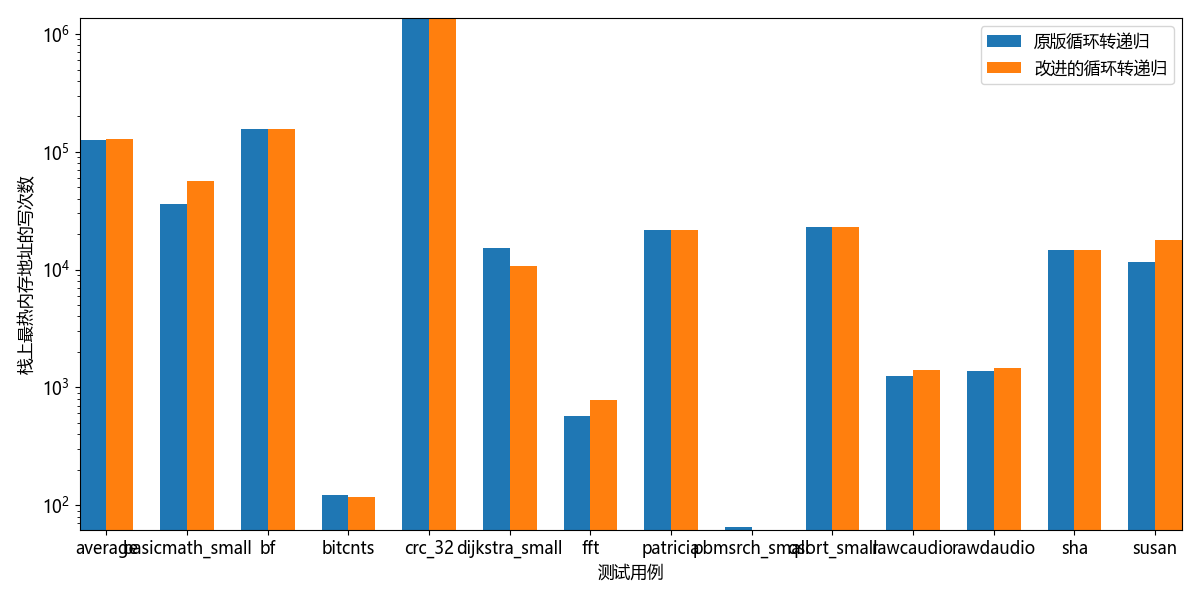

In [32]:
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数图, _ = grouped_bar_chart_from_dataframe(
    benchmark_writes_on_hottest_stack_addresses[benchmark_writes_on_hottest_stack_addresses['executable_type'].isin({'loop2recursion', 'new_loop2recursion'})].sort_values(by=['benchmark', 'executable_type']),
    'writes_on_hottest_stack_address',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [33]:
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表 = calculate_increases(benchmark_writes_on_hottest_stack_addresses, 'loop2recursion', ['new_loop2recursion'], 'writes_on_hottest_stack_address').rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,1.27e+05,1.29e+05,1.33e-02
1,basicmath_small,3.60e+04,5.60e+04,5.55e-01
2,bf,1.56e+05,1.56e+05,0.00e+00
3,bitcnts,1.21e+02,1.18e+02,-2.48e-02
4,crc_32,1.37e+06,1.37e+06,0.00e+00
5,dijkstra_small,1.53e+04,1.07e+04,-3.02e-01
6,fft,5.67e+02,7.76e+02,3.69e-01
7,patricia,2.18e+04,2.18e+04,0.00e+00
8,pbmsrch_small,6.50e+01,6.10e+01,-6.15e-02
9,qsort_small,2.30e+04,2.30e+04,6.09e-04


In [34]:
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表Latex = 我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='原版循环转递归和我们的循环转递归栈上最热内存地址的写次数表',
    label='原版循环转递归和我们的循环转递归栈上最热内存地址的写次数表',
    index=False
)
print(我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归栈上最热内存地址的写次数表}
\label{原版循环转递归和我们的循环转递归栈上最热内存地址的写次数表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average & 1.27e+05 &  1.29e+05 &      1.33\% \\
basicmath\_small & 3.60e+04 &  5.60e+04 &     55.55\% \\
             bf & 1.56e+05 &  1.56e+05 &      0.00\% \\
        bitcnts & 1.21e+02 &  1.18e+02 &     -2.48\% \\
         crc\_32 & 1.37e+06 &  1.37e+06 &      0.00\% \\
 dijkstra\_small & 1.53e+04 &  1.07e+04 &    -30.21\% \\
            fft & 5.67e+02 &  7.76e+02 &     36.86\% \\
       patricia & 2.18e+04 &  2.18e+04 &      0.00\% \\
  pbmsrch\_small & 6.50e+01 &  6.10e+01 &     -6.15\% \\
    qsort\_small & 2.30e+04 &  2.30e+04 &      0.06\% \\
      rawcaudio & 1.25e+03 &  1.41e+03 &     13.39\% \\
      rawdaudio & 1.37e+03 &  1.46e+03 &      6.64\% \\
            sha & 1.46e+04 &  1.46e+04 &      0.00\% \\
          susan & 1.17e+04 &  1.78e+04 &     52.57\% \\
\bottomrule
\

In [35]:
我们的方法与原版循环转递归的对比NL表 = calculate_increases(benchmark_normalized_lifetimes, 'loop2recursion', ['new_loop2recursion'], 'normalized_lifetime').rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比NL表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,1.50e-05,2.00e-05,3.32e-01
1,basicmath_small,4.37e-03,4.01e-03,-8.15e-02
2,bf,1.18e-04,2.19e-04,8.57e-01
3,bitcnts,3.89e-02,3.52e-02,-9.40e-02
4,crc_32,1.37e-07,1.60e-07,1.67e-01
5,dijkstra_small,3.12e-02,4.61e-02,4.77e-01
6,fft,2.00e-02,3.19e-02,5.95e-01
7,patricia,4.90e-04,9.45e-04,9.27e-01
8,pbmsrch_small,4.36e-02,4.38e-02,4.78e-03
9,qsort_small,1.33e-05,1.33e-05,6.55e-03


In [36]:
我们的方法与原版循环转递归的对比NL表Latex = 我们的方法与原版循环转递归的对比NL表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='我们的方法与原版循环转递归的对比NL表',
    label='我们的方法与原版循环转递归的对比NL表',
    index=False
)
print(我们的方法与原版循环转递归的对比NL表Latex)

\begin{table}
\centering
\caption{我们的方法与原版循环转递归的对比NL表}
\label{我们的方法与原版循环转递归的对比NL表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average & 1.50e-05 &  2.00e-05 &     33.18\% \\
basicmath\_small & 4.37e-03 &  4.01e-03 &     -8.15\% \\
             bf & 1.18e-04 &  2.19e-04 &     85.69\% \\
        bitcnts & 3.89e-02 &  3.52e-02 &     -9.40\% \\
         crc\_32 & 1.37e-07 &  1.60e-07 &     16.72\% \\
 dijkstra\_small & 3.12e-02 &  4.61e-02 &     47.72\% \\
            fft & 2.00e-02 &  3.19e-02 &     59.54\% \\
       patricia & 4.90e-04 &  9.45e-04 &     92.74\% \\
  pbmsrch\_small & 4.36e-02 &  4.38e-02 &      0.48\% \\
    qsort\_small & 1.33e-05 &  1.33e-05 &      0.65\% \\
      rawcaudio & 8.76e-02 &  8.98e-02 &      2.54\% \\
      rawdaudio & 7.56e-02 &  7.72e-02 &      2.09\% \\
            sha & 4.72e-03 &  1.68e-02 &    255.65\% \\
          susan & 4.89e-03 &  1.98e-03 &    -59.56\% \\
\bottomrule
\end{tabular}
\end{ta

In [37]:
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数平均增幅, *_ = 我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表[
    我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表['测试用例'] == 'average'
]['改进的循环转递归增长']
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数平均增幅Latex = pylatex.utils.escape_latex('{:,.2%}'.format(我们的方法与原版循环转递归的对比栈上最热内存地址的写次数平均增幅))
我们的方法与原版循环转递归的对比栈上最热内存地址的写次数平均增幅Latex

NoEscape(1.33\%)

### 栈帧中最热内存地址的写次数

In [38]:
我们的方法与原版循环转递归的对比栈栈帧中最热内存地址的写次数表 = calculate_increases(
    writes_on_hottest_address_in_stack_frames,
    'loop2recursion',
    ['new_loop2recursion'],
    'writes_on_hottest_address_in_stack_frames'
).rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比栈栈帧中最热内存地址的写次数表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,1.24e+05,1.24e+05,0.0
1,basicmath_small,3.60e+04,3.60e+04,0.0
2,bf,1.56e+05,1.56e+05,0.0
3,bitcnts,2.10e+01,2.10e+01,0.0
4,crc_32,1.37e+06,1.37e+06,0.0
5,dijkstra_small,1.00e+04,1.00e+04,0.0
6,fft,6.22e+02,6.22e+02,0.0
7,patricia,2.18e+04,2.18e+04,0.0
8,pbmsrch_small,1.40e+01,1.40e+01,0.0
9,qsort_small,1.00e+04,1.00e+04,0.0


In [39]:
我们的方法与原版循环转递归的对比栈栈帧中最热内存地址的写次数表Latex = 我们的方法与原版循环转递归的对比栈栈帧中最热内存地址的写次数表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    label='原版循环转递归和我们的循环转递归栈帧中最热内存地址的写次数表',
    caption='原版循环转递归和我们的循环转递归栈帧中最热内存地址的写次数表',
    index=False
)
print(我们的方法与原版循环转递归的对比栈栈帧中最热内存地址的写次数表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归栈帧中最热内存地址的写次数表}
\label{原版循环转递归和我们的循环转递归栈帧中最热内存地址的写次数表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average & 1.24e+05 &  1.24e+05 &      0.00\% \\
basicmath\_small & 3.60e+04 &  3.60e+04 &      0.00\% \\
             bf & 1.56e+05 &  1.56e+05 &      0.00\% \\
        bitcnts & 2.10e+01 &  2.10e+01 &      0.00\% \\
         crc\_32 & 1.37e+06 &  1.37e+06 &      0.00\% \\
 dijkstra\_small & 1.00e+04 &  1.00e+04 &      0.00\% \\
            fft & 6.22e+02 &  6.22e+02 &      0.00\% \\
       patricia & 2.18e+04 &  2.18e+04 &      0.00\% \\
  pbmsrch\_small & 1.40e+01 &  1.40e+01 &      0.00\% \\
    qsort\_small & 1.00e+04 &  1.00e+04 &      0.00\% \\
      rawcaudio & 1.00e+01 &  1.00e+01 &      0.00\% \\
      rawdaudio & 1.00e+01 &  1.00e+01 &      0.00\% \\
            sha & 1.46e+04 &  1.46e+04 &      0.00\% \\
          susan & 1.00e+01 &  1.00e+01 &      0.00\% \\
\bottomrule

### 栈上一个内存地址上方栈帧数的最大值

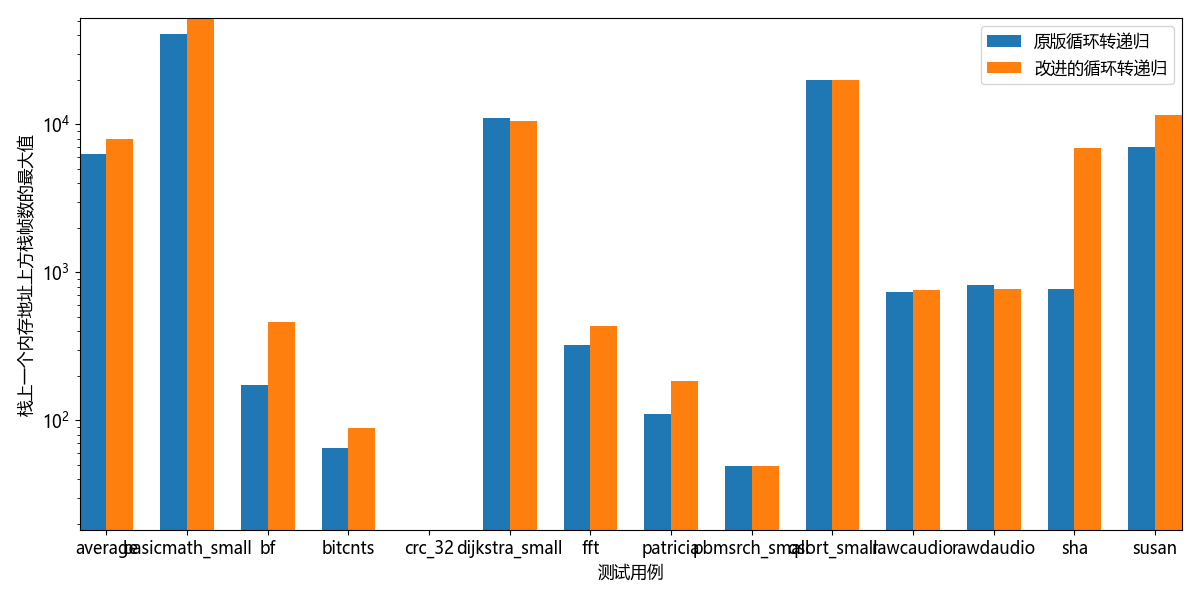

In [40]:
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值图, _ = grouped_bar_chart_from_dataframe(
    max_number_of_stack_frames_on_a_stack_address[max_number_of_stack_frames_on_a_stack_address['executable_type'].isin({'loop2recursion','new_loop2recursion'})].sort_values(by=['benchmark', 'executable_type']),
    'max_number_of_stack_frames_on_a_stack_address',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [41]:
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表 = calculate_increases(
    max_number_of_stack_frames_on_a_stack_address,
    'loop2recursion',
    ['new_loop2recursion'],
    'max_number_of_stack_frames_on_a_stack_address'
).rename(english_and_chinese_labels, axis='columns')
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表

,测试用例,原版循环转递归,改进的循环转递归,改进的循环转递归增长
0,average,6331.54,8003.08,2.64e-01
1,basicmath_small,41049.00,52288.00,2.74e-01
2,bf,174.00,461.00,1.65e+00
3,bitcnts,65.00,88.00,3.54e-01
4,crc_32,18.00,18.00,0.00e+00
5,dijkstra_small,11112.00,10493.00,-5.57e-02
6,fft,321.00,436.00,3.58e-01
7,patricia,111.00,184.00,6.58e-01
8,pbmsrch_small,49.00,49.00,0.00e+00
9,qsort_small,20014.00,20028.00,7.00e-04


In [42]:
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表Latex = 我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表.to_latex(
    formatters={
        '改进的循环转递归增长': '{:,.2%}'.format,
    },
    caption='原版循环转递归和我们的循环转递归栈上一个内存地址上方栈帧数的最大值表',
    label='原版循环转递归和我们的循环转递归栈上一个内存地址上方栈帧数的最大值表',
    index=False
)
print(我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表Latex)

\begin{table}
\centering
\caption{原版循环转递归和我们的循环转递归栈上一个内存地址上方栈帧数的最大值表}
\label{原版循环转递归和我们的循环转递归栈上一个内存地址上方栈帧数的最大值表}
\begin{tabular}{lrrr}
\toprule
           测试用例 &  原版循环转递归 &  改进的循环转递归 & 改进的循环转递归增长 \\
\midrule
        average &  6331.54 &   8003.08 &     26.40\% \\
basicmath\_small & 41049.00 &  52288.00 &     27.38\% \\
             bf &   174.00 &    461.00 &    164.94\% \\
        bitcnts &    65.00 &     88.00 &     35.38\% \\
         crc\_32 &    18.00 &     18.00 &      0.00\% \\
 dijkstra\_small & 11112.00 &  10493.00 &     -5.57\% \\
            fft &   321.00 &    436.00 &     35.83\% \\
       patricia &   111.00 &    184.00 &     65.77\% \\
  pbmsrch\_small &    49.00 &     49.00 &      0.00\% \\
    qsort\_small & 20014.00 &  20028.00 &      0.07\% \\
      rawcaudio &   741.00 &    758.00 &      2.29\% \\
      rawdaudio &   822.00 &    772.00 &     -6.08\% \\
            sha &   765.00 &   6941.00 &    807.32\% \\
          susan &  7069.00 &  11524.00 &     63.02\% \\
\bo

In [43]:
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值平均增幅, *_ = 我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表[
    我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表['测试用例'] == 'average'
]['改进的循环转递归增长']
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值平均增幅Latex = pylatex.utils.escape_latex('{:,.2%}'.format(我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值平均增幅))
我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值平均增幅Latex

NoEscape(26.40\%)

In [44]:
import numpy as np


def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

相关系数 = correlation_coefficient(
    我们的方法与原版循环转递归的对比栈上一个内存地址上方栈帧数的最大值表['改进的循环转递归'],
    我们的方法与原版循环转递归的对比栈上最热内存地址的写次数表['改进的循环转递归']
)

相关系数

-0.1329284012303526

In [45]:
相关系数Latex = pylatex.utils.escape_latex('{:,.4}'.format(相关系数))

# 限制递归深度和在递归函数中保留一部分循环

## 限制不同的递归深度

In [46]:
types_of_benchmarks = !ls 'benchmark_executables'

In [47]:
import re


def f():
    only_recursion_depth_limit_benchmark_type_pattern = re.compile(r'new_loop2recursion-recursion_depth_limit-(\d+)')
    for benchmark_type in types_of_benchmarks:
        match = only_recursion_depth_limit_benchmark_type_pattern.match(benchmark_type)
        if match:
            recursion_depth_limit_string, *_ = match.groups()
            recursion_depth_limit = int(recursion_depth_limit_string)
            yield recursion_depth_limit

recursion_depth_limits = list(f())
recursion_depth_limits.sort()
recursion_depth_limits

[8, 16, 32, 64]

In [48]:
递归深度限制Latex = pylatex.utils.escape_latex('、'.join(map(str, recursion_depth_limits)))
递归深度限制Latex

NoEscape(8、16、32、64)

In [49]:
for recursion_depth_limit in recursion_depth_limits:
    if recursion_depth_limit:
        english_and_chinese_labels[f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}'] = f'递归深度为{recursion_depth_limit}'
        english_and_chinese_labels[f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}_increase'] = f'递归深度为{recursion_depth_limit}增长'
english_and_chinese_labels['new_loop2recursion'] = '无优化'

In [94]:
import math


executable_types_and_orders = {
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}': recursion_depth_limit
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
}
executable_types_and_orders[
    'new_loop2recursion'
] = math.inf

In [51]:
recursion_depth_limit_benchmark_instruction_counts = benchmark_instruction_counts[
    benchmark_instruction_counts['executable_type'].isin(
        executable_types_and_orders
    )
].copy()
recursion_depth_limit_benchmark_instruction_counts['executable_type_order'] = recursion_depth_limit_benchmark_instruction_counts['executable_type'].map(executable_types_and_orders)
recursion_depth_limit_benchmark_instruction_counts.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

In [52]:
recursion_depth_limit_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        executable_types_and_orders
    )
].copy()

recursion_depth_limit_benchmark_max_stack_usages['executable_type_order'] = recursion_depth_limit_benchmark_max_stack_usages['executable_type'].map(executable_types_and_orders)
recursion_depth_limit_benchmark_max_stack_usages.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

In [53]:
recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        executable_types_and_orders
    )
].copy()

recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['executable_type_order'] = recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['executable_type'].map(executable_types_and_orders)
recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

In [95]:
recursion_depth_limit_benchmark_normalized_lifetimes = benchmark_normalized_lifetimes[
    benchmark_normalized_lifetimes['executable_type'].isin(
        executable_types_and_orders
    )
].copy()

recursion_depth_limit_benchmark_normalized_lifetimes['executable_type_order'] = recursion_depth_limit_benchmark_normalized_lifetimes['executable_type'].map(executable_types_and_orders)
recursion_depth_limit_benchmark_normalized_lifetimes.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

### 损耗均衡的高效性

#### 栈区内存的使用量

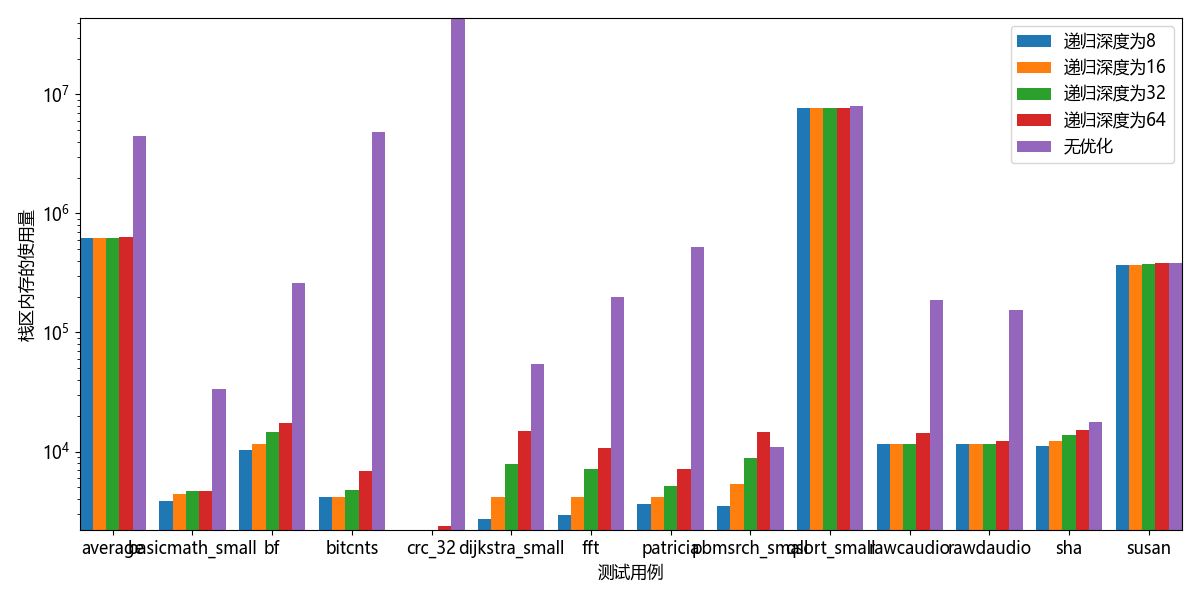

In [54]:
限制不同的递归深度栈区内存的使用量图, _ = grouped_bar_chart_from_dataframe(
    recursion_depth_limit_benchmark_max_stack_usages,
    'max_stack_usage',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [55]:
限制不同的递归深度栈区内存的使用量表 = calculate_increases(
    recursion_depth_limit_benchmark_max_stack_usages, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}'
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    ],
    'max_stack_usage'
).rename(english_and_chinese_labels, axis='columns')
限制不同的递归深度栈区内存的使用量表

,测试用例,无优化,递归深度为8,递归深度为8增长,递归深度为16,递归深度为16增长,递归深度为32,递归深度为32增长,递归深度为64,递归深度为64增长
0,average,4.49e+06,6.25e+05,-0.86,6.25e+05,-0.86,6.27e+05,-0.86,6.30e+05,-8.60e-01
1,basicmath_small,3.38e+04,3.84e+03,-0.89,4.43e+03,-0.87,4.69e+03,-0.86,4.69e+03,-8.61e-01
2,bf,2.62e+05,1.03e+04,-0.96,1.17e+04,-0.96,1.45e+04,-0.94,1.74e+04,-9.33e-01
3,bitcnts,4.80e+06,4.18e+03,-1.00,4.18e+03,-1.00,4.78e+03,-1.00,6.83e+03,-9.99e-01
4,crc_32,4.38e+07,2.18e+03,-1.00,2.18e+03,-1.00,2.18e+03,-1.00,2.35e+03,-1.00e+00
5,dijkstra_small,5.47e+04,2.69e+03,-0.95,4.19e+03,-0.92,7.90e+03,-0.86,1.48e+04,-7.29e-01
6,fft,1.97e+05,2.91e+03,-0.99,4.18e+03,-0.98,7.15e+03,-0.96,1.06e+04,-9.46e-01
7,patricia,5.26e+05,3.62e+03,-0.99,4.13e+03,-0.99,5.15e+03,-0.99,7.20e+03,-9.86e-01
8,pbmsrch_small,1.08e+04,3.50e+03,-0.68,5.30e+03,-0.51,8.88e+03,-0.18,1.45e+04,3.37e-01
9,qsort_small,8.00e+06,7.68e+06,-0.04,7.68e+06,-0.04,7.68e+06,-0.04,7.68e+06,-3.97e-02


In [56]:
限制不同的递归深度栈区内存的使用量表Latex = 限制不同的递归深度栈区内存的使用量表.to_latex(
    formatters={
        f'递归深度为{recursion_depth_limit}增长': '{:,.2%}'.format
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    },
    columns=['测试用例'] + [f'递归深度为{recursion_depth_limit}增长' for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit],
    caption='限制不同的递归深度时不同测试用例栈区内存的使用量表',
    label='限制不同的递归深度时不同测试用例栈区内存的使用量表',
    index=False
)
print(限制不同的递归深度栈区内存的使用量表Latex)

\begin{table}
\centering
\caption{限制不同的递归深度时不同测试用例栈区内存的使用量表}
\label{限制不同的递归深度时不同测试用例栈区内存的使用量表}
\begin{tabular}{lrrrr}
\toprule
           测试用例 & 递归深度为8增长 & 递归深度为16增长 & 递归深度为32增长 & 递归深度为64增长 \\
\midrule
        average &  -86.10\% &   -86.09\% &   -86.05\% &   -85.99\% \\
basicmath\_small &  -88.64\% &   -86.88\% &   -86.13\% &   -86.13\% \\
             bf &  -96.08\% &   -95.54\% &   -94.47\% &   -93.34\% \\
        bitcnts &  -99.91\% &   -99.91\% &   -99.90\% &   -99.86\% \\
         crc\_32 & -100.00\% &  -100.00\% &  -100.00\% &   -99.99\% \\
 dijkstra\_small &  -95.08\% &   -92.33\% &   -85.54\% &   -72.90\% \\
            fft &  -98.52\% &   -97.88\% &   -96.37\% &   -94.60\% \\
       patricia &  -99.31\% &   -99.21\% &   -99.02\% &   -98.63\% \\
  pbmsrch\_small &  -67.65\% &   -51.11\% &   -18.02\% &    33.68\% \\
    qsort\_small &   -4.00\% &    -3.99\% &    -3.99\% &    -3.97\% \\
      rawcaudio &  -93.79\% &   -93.79\% &   -93.79\% &   -92.32\% \\
      rawdaudio &  -92.

In [57]:
限制不同的递归深度栈区内存的使用量递归深度的限制最大时平均减小, *_ = 限制不同的递归深度栈区内存的使用量表[
    限制不同的递归深度栈区内存的使用量表['测试用例'] == 'average'
][f'递归深度为{recursion_depth_limits[-1]}增长']

限制不同的递归深度栈区内存的使用量递归深度的限制最大时平均减小Latex = pylatex.utils.escape_latex('{:,.2%}'.format(限制不同的递归深度栈区内存的使用量递归深度的限制最大时平均减小))
限制不同的递归深度栈区内存的使用量递归深度的限制最大时平均减小Latex

NoEscape({-}85.99\%)

#### 指令数

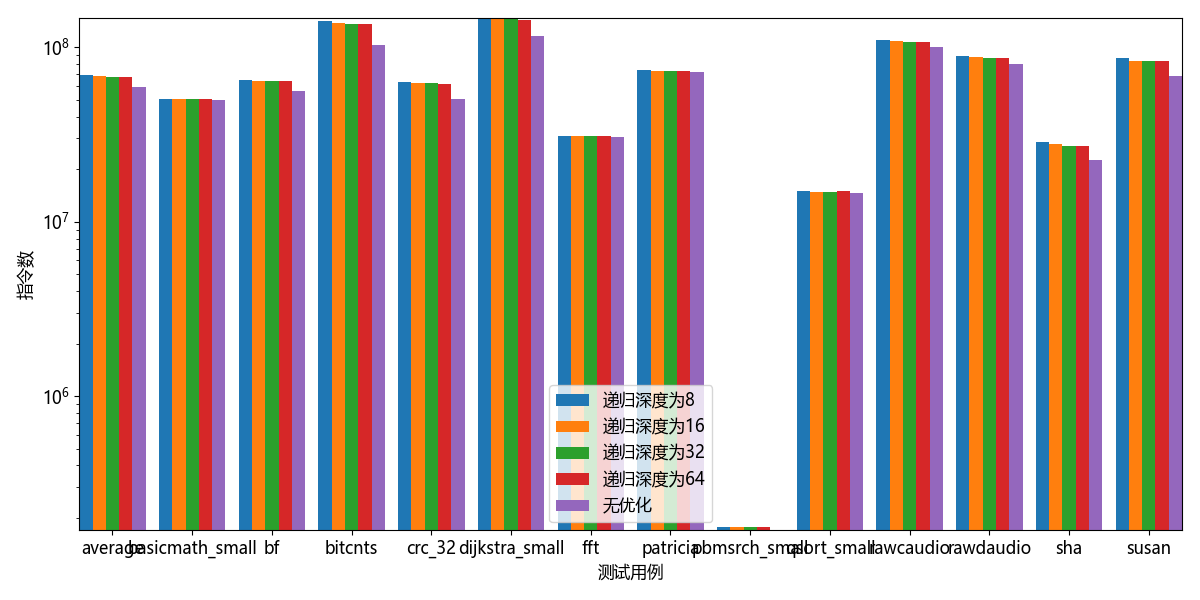

In [58]:
限制不同的递归深度指令数图, _ = grouped_bar_chart_from_dataframe(
    recursion_depth_limit_benchmark_instruction_counts,
    'instruction_count',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [59]:
限制不同的递归深度指令数表 = calculate_increases(
    recursion_depth_limit_benchmark_instruction_counts, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}'
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    ],
    'instruction_count'
).rename(english_and_chinese_labels, axis='columns')
限制不同的递归深度指令数表

,测试用例,无优化,递归深度为8,递归深度为8增长,递归深度为16,递归深度为16增长,递归深度为32,递归深度为32增长,递归深度为64,递归深度为64增长
0,average,5.90e+07,6.93e+07,0.18,6.83e+07,0.16,6.78e+07,0.15,6.77e+07,0.15
1,basicmath_small,4.97e+07,5.05e+07,0.02,5.04e+07,0.01,5.04e+07,0.01,5.04e+07,0.01
2,bf,5.62e+07,6.49e+07,0.15,6.43e+07,0.15,6.41e+07,0.14,6.38e+07,0.14
3,bitcnts,1.04e+08,1.41e+08,0.36,1.38e+08,0.33,1.36e+08,0.31,1.36e+08,0.31
4,crc_32,5.07e+07,6.36e+07,0.25,6.26e+07,0.23,6.22e+07,0.23,6.19e+07,0.22
5,dijkstra_small,1.17e+08,1.47e+08,0.26,1.45e+08,0.25,1.44e+08,0.24,1.44e+08,0.23
6,fft,3.05e+07,3.11e+07,0.02,3.10e+07,0.02,3.10e+07,0.02,3.10e+07,0.02
7,patricia,7.24e+07,7.36e+07,0.02,7.35e+07,0.01,7.35e+07,0.01,7.35e+07,0.01
8,pbmsrch_small,1.70e+05,1.78e+05,0.05,1.78e+05,0.05,1.78e+05,0.05,1.78e+05,0.05
9,qsort_small,1.46e+07,1.51e+07,0.03,1.48e+07,0.01,1.48e+07,0.01,1.51e+07,0.03


In [60]:
限制不同的递归深度指令数表Latex = 限制不同的递归深度指令数表.to_latex(
    formatters={
        f'递归深度为{recursion_depth_limit}增长': '{:,.2%}'.format
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    },
    columns=['测试用例'] + [f'递归深度为{recursion_depth_limit}增长' for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit],
    caption='限制不同的递归深度时不同测试用例的指令数表',
    label='限制不同的递归深度时不同测试用例的指令数表',
    index=False
)
print(限制不同的递归深度指令数表Latex)

\begin{table}
\centering
\caption{限制不同的递归深度时不同测试用例的指令数表}
\label{限制不同的递归深度时不同测试用例的指令数表}
\begin{tabular}{lrrrr}
\toprule
           测试用例 & 递归深度为8增长 & 递归深度为16增长 & 递归深度为32增长 & 递归深度为64增长 \\
\midrule
        average &   17.52\% &    15.76\% &    15.03\% &    14.82\% \\
basicmath\_small &    1.57\% &     1.46\% &     1.42\% &     1.42\% \\
             bf &   15.45\% &    14.53\% &    14.07\% &    13.61\% \\
        bitcnts &   36.42\% &    32.98\% &    31.24\% &    31.12\% \\
         crc\_32 &   25.29\% &    23.44\% &    22.51\% &    22.05\% \\
 dijkstra\_small &   26.06\% &    24.52\% &    23.75\% &    23.29\% \\
            fft &    1.84\% &     1.73\% &     1.68\% &     1.66\% \\
       patricia &    1.64\% &     1.44\% &     1.44\% &     1.44\% \\
  pbmsrch\_small &    4.93\% &     4.89\% &     4.88\% &     4.87\% \\
    qsort\_small &    2.87\% &     1.15\% &     1.12\% &     2.82\% \\
      rawcaudio &    9.09\% &     7.61\% &     6.88\% &     6.49\% \\
      rawdaudio &   11.45\% &  

### 损耗均衡的有效性

#### 栈上最热内存地址的写次数

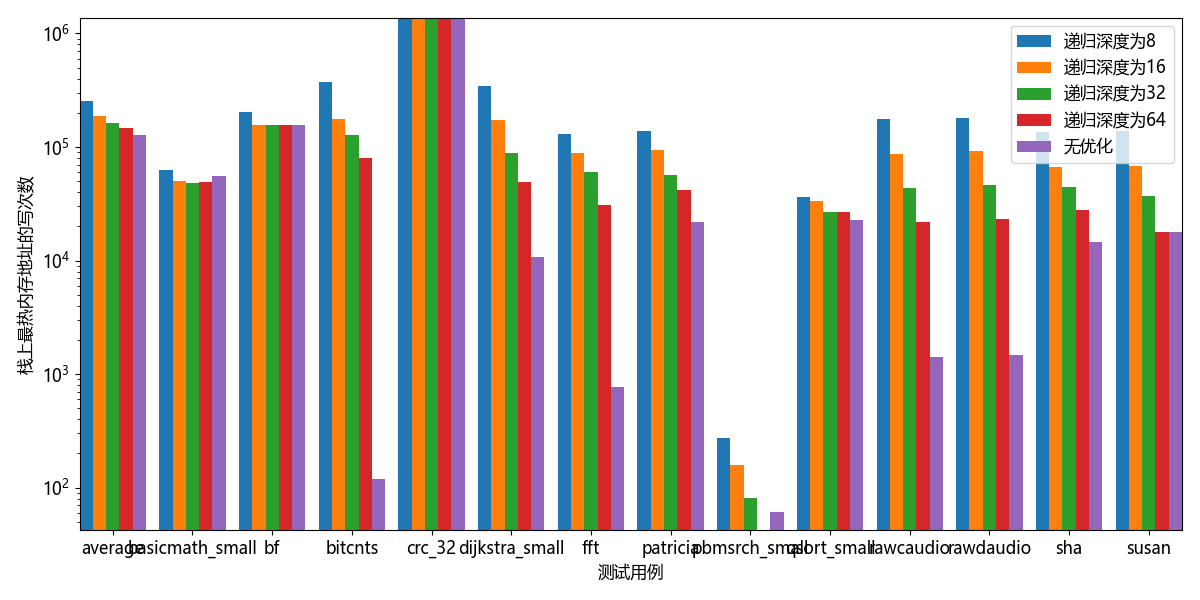

In [61]:
限制不同的递归深度栈上最热内存地址的写次数图, _ = grouped_bar_chart_from_dataframe(
    recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    'writes_on_hottest_stack_address',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [62]:
限制不同的递归深度栈上最热内存地址的写次数表 = calculate_increases(
    recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}'
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    ],
    'writes_on_hottest_stack_address'
).rename(english_and_chinese_labels, axis='columns')
限制不同的递归深度栈上最热内存地址的写次数表

,测试用例,无优化,递归深度为8,递归深度为8增长,递归深度为16,递归深度为16增长,递归深度为32,递归深度为32增长,递归深度为64,递归深度为64增长
0,average,1.29e+05,2.53e+05,0.97,1.89e+05,0.47,1.62e+05,0.26,1.46e+05,1.32e-01
1,basicmath_small,5.60e+04,6.28e+04,0.12,5.05e+04,-0.10,4.78e+04,-0.15,4.90e+04,-1.26e-01
2,bf,1.56e+05,2.04e+05,0.31,1.56e+05,0.00,1.56e+05,0.00,1.56e+05,0.00e+00
3,bitcnts,1.18e+02,3.75e+05,3177.12,1.78e+05,1508.93,1.27e+05,1071.10,7.98e+04,6.75e+02
4,crc_32,1.37e+06,1.37e+06,0.00,1.37e+06,0.00,1.37e+06,0.00,1.37e+06,0.00e+00
5,dijkstra_small,1.07e+04,3.44e+05,31.22,1.74e+05,15.32,8.93e+04,7.37,4.95e+04,3.64e+00
6,fft,7.76e+02,1.30e+05,166.12,8.94e+04,114.21,6.02e+04,76.60,3.10e+04,3.90e+01
7,patricia,2.18e+04,1.37e+05,5.30,9.32e+04,3.28,5.66e+04,1.60,4.20e+04,9.26e-01
8,pbmsrch_small,6.10e+01,2.72e+02,3.46,1.57e+02,1.57,8.10e+01,0.33,4.20e+01,-3.11e-01
9,qsort_small,2.30e+04,3.63e+04,0.58,3.38e+04,0.47,2.69e+04,0.17,2.70e+04,1.76e-01


In [63]:
限制不同的递归深度栈上最热内存地址的写次数表Latex = 限制不同的递归深度栈上最热内存地址的写次数表.to_latex(
    formatters={
        f'递归深度为{recursion_depth_limit}增长': '{:,.2%}'.format
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    },
    columns=['测试用例'] + [f'递归深度为{recursion_depth_limit}增长' for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit],
    caption='限制不同的递归深度时不同测试用例栈上最热内存地址的写次数表',
    label='限制不同的递归深度时不同测试用例栈上最热内存地址的写次数表',
    index=False
)
print(限制不同的递归深度栈上最热内存地址的写次数表Latex)

\begin{table}
\centering
\caption{限制不同的递归深度时不同测试用例栈上最热内存地址的写次数表}
\label{限制不同的递归深度时不同测试用例栈上最热内存地址的写次数表}
\begin{tabular}{lrrrr}
\toprule
           测试用例 &    递归深度为8增长 &   递归深度为16增长 &   递归深度为32增长 &  递归深度为64增长 \\
\midrule
        average &      96.90\% &      47.02\% &      25.78\% &     13.23\% \\
basicmath\_small &      12.16\% &      -9.82\% &     -14.63\% &    -12.60\% \\
             bf &      30.64\% &       0.00\% &       0.00\% &      0.00\% \\
        bitcnts & 317,711.86\% & 150,893.22\% & 107,110.17\% & 67,490.68\% \\
         crc\_32 &       0.00\% &       0.00\% &       0.00\% &      0.00\% \\
 dijkstra\_small &   3,122.34\% &   1,532.07\% &     736.83\% &    363.52\% \\
            fft &  16,612.50\% &  11,421.01\% &   7,659.79\% &  3,895.49\% \\
       patricia &     530.03\% &     327.99\% &     159.89\% &     92.65\% \\
  pbmsrch\_small &     345.90\% &     157.38\% &      32.79\% &    -31.15\% \\
    qsort\_small &      57.68\% &      46.83\% &      16.94\% &     17.55\% 

In [96]:
recursion_depth_limit_benchmark_normalized_lifetimes

,executable_type,benchmark,normalized_lifetime,executable_type_order
158,new_loop2recursion-recursion_depth_limit-8,average,9.24e-05,8.0
160,new_loop2recursion-recursion_depth_limit-16,average,1.20e-04,16.0
165,new_loop2recursion-recursion_depth_limit-32,average,1.37e-04,32.0
157,new_loop2recursion-recursion_depth_limit-64,average,1.51e-04,64.0
167,new_loop2recursion,average,2.00e-05,inf
...,...,...,...,...
33,new_loop2recursion-recursion_depth_limit-8,susan,3.61e-04,8.0
59,new_loop2recursion-recursion_depth_limit-16,susan,6.84e-04,16.0
124,new_loop2recursion-recursion_depth_limit-32,susan,1.26e-03,32.0
20,new_loop2recursion-recursion_depth_limit-64,susan,2.55e-03,64.0


In [97]:
限制不同的递归深度NL表 = calculate_increases(
    recursion_depth_limit_benchmark_normalized_lifetimes, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}'
        for recursion_depth_limit in recursion_depth_limits if recursion_depth_limit
    ],
    'normalized_lifetime'
).rename(english_and_chinese_labels, axis='columns')
限制不同的递归深度NL表

,测试用例,无优化,递归深度为8,递归深度为8增长,递归深度为16,递归深度为16增长,递归深度为32,递归深度为32增长,递归深度为64,递归深度为64增长
0,average,2.00e-05,9.24e-05,3.62,1.20e-04,4.98,1.37e-04,5.88e+00,1.51e-04,6.57e+00
1,basicmath_small,4.01e-03,3.23e-02,7.04,3.47e-02,7.64,3.46e-02,7.61e+00,3.38e-02,7.41e+00
2,bf,2.19e-04,5.44e-03,23.84,6.13e-03,26.95,4.88e-03,2.13e+01,4.02e-03,1.73e+01
3,bitcnts,3.52e-02,1.95e-02,-0.45,3.87e-02,0.10,4.62e-02,3.12e-01,5.12e-02,4.55e-01
4,crc_32,1.60e-07,4.43e-03,27669.88,4.28e-03,26772.21,4.21e-03,2.63e+04,3.86e-03,2.41e+04
5,dijkstra_small,4.61e-02,3.81e-02,-0.17,4.71e-02,0.02,4.82e-02,4.58e-02,4.61e-02,3.01e-04
6,fft,3.19e-02,1.34e-02,-0.58,1.35e-02,-0.58,1.17e-02,-6.33e-01,1.53e-02,-5.21e-01
7,patricia,9.45e-04,2.25e-02,22.83,2.89e-02,29.55,3.81e-02,3.93e+01,3.68e-02,3.79e+01
8,pbmsrch_small,4.38e-02,3.29e-02,-0.25,3.77e-02,-0.14,4.35e-02,-6.02e-03,5.15e-02,1.75e-01
9,qsort_small,1.33e-05,8.98e-06,-0.33,9.63e-06,-0.28,1.21e-05,-9.41e-02,1.20e-05,-9.93e-02


## 在递归中包含循环

In [64]:
import re


def f():
    only_loop_iterations_in_recursive_function_pattern = re.compile(r'new_loop2recursion-loop_iterations-(\d+)')
    for benchmark_type in types_of_benchmarks:
        match = only_loop_iterations_in_recursive_function_pattern.match(benchmark_type)
        if match:
            loop_iterations_in_recursive_function_string, *_ = match.groups()
            loop_iterations_in_recursive_function = int(loop_iterations_in_recursive_function_string)
            yield loop_iterations_in_recursive_function

loop_iterations_in_recursive_functions = list(f())
loop_iterations_in_recursive_functions.sort()
loop_iterations_in_recursive_functions

[2, 4, 8, 16, 32, 64]

In [65]:
for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions:
    if loop_iterations_in_recursive_function:
        english_and_chinese_labels[f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}'] = f'循环次数为{loop_iterations_in_recursive_function}'
        english_and_chinese_labels[f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}_increase'] = f'循环次数为{loop_iterations_in_recursive_function}增长'
english_and_chinese_labels['new_loop2recursion'] = '无优化'

In [66]:
循环次数Latex = pylatex.utils.escape_latex('、'.join(map(str, loop_iterations_in_recursive_functions[1:])))
循环次数Latex

NoEscape(4、8、16、32、64)

In [67]:
import math


executable_types_and_orders = {
        f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}': loop_iterations_in_recursive_function
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions
}

executable_types_and_orders['new_loop2recursion'] = 0

In [68]:
loop_iterations_in_recursive_function_benchmark_instruction_counts = benchmark_instruction_counts[
    benchmark_instruction_counts['executable_type'].isin(
        executable_types_and_orders
    )
].copy()
loop_iterations_in_recursive_function_benchmark_instruction_counts['executable_type_order'] = loop_iterations_in_recursive_function_benchmark_instruction_counts['executable_type'].map(executable_types_and_orders)
loop_iterations_in_recursive_function_benchmark_instruction_counts.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

In [69]:
loop_iterations_in_recursive_function_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        executable_types_and_orders
    )
].copy()

loop_iterations_in_recursive_function_benchmark_max_stack_usages['executable_type_order'] = loop_iterations_in_recursive_function_benchmark_max_stack_usages['executable_type'].map(executable_types_and_orders)
loop_iterations_in_recursive_function_benchmark_max_stack_usages.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

In [70]:
loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        executable_types_and_orders
    )
].copy()

loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses['executable_type_order'] = loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses['executable_type'].map(executable_types_and_orders)
loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses.sort_values(by=['benchmark', 'executable_type_order'], inplace=True)

### 损耗均衡的高效性

#### 栈区内存的使用量

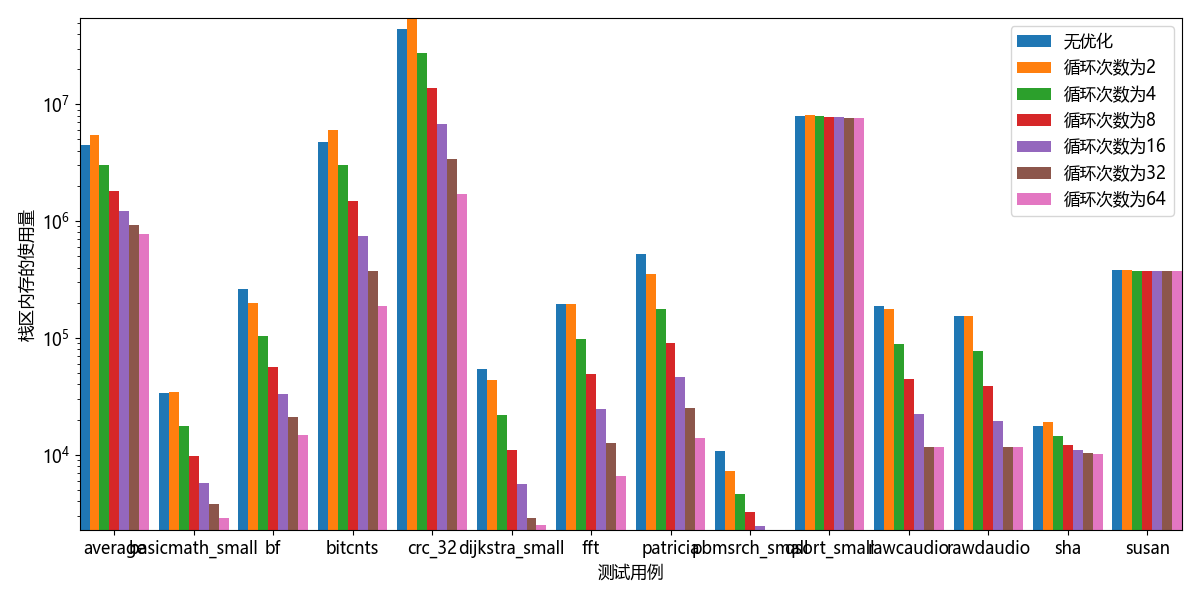

In [71]:
在递归中包含循环栈区内存的使用量图, _ = grouped_bar_chart_from_dataframe(
    loop_iterations_in_recursive_function_benchmark_max_stack_usages,
    'max_stack_usage',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [72]:
在递归中包含循环栈区内存的使用量表 = calculate_increases(
    loop_iterations_in_recursive_function_benchmark_max_stack_usages, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}'
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    ],
    'max_stack_usage'
).rename(english_and_chinese_labels, axis='columns')
在递归中包含循环栈区内存的使用量表

,测试用例,无优化,循环次数为2,循环次数为2增长,循环次数为4,循环次数为4增长,循环次数为8,循环次数为8增长,循环次数为16,循环次数为16增长,循环次数为32,循环次数为32增长,循环次数为64,循环次数为64增长
0,average,4.49e+06,5.42e+06,2.05e-01,3.02e+06,-0.33,1.82e+06,-0.60,1.22e+06,-0.73,9.21e+05,-0.80,7.73e+05,-0.83
1,basicmath_small,3.38e+04,3.43e+04,1.56e-02,1.78e+04,-0.47,9.82e+03,-0.71,5.79e+03,-0.83,3.81e+03,-0.89,2.88e+03,-0.91
2,bf,2.62e+05,2.00e+05,-2.37e-01,1.04e+05,-0.60,5.67e+04,-0.78,3.29e+04,-0.87,2.10e+04,-0.92,1.49e+04,-0.94
3,bitcnts,4.80e+06,6.00e+06,2.50e-01,3.00e+06,-0.38,1.50e+06,-0.69,7.51e+05,-0.84,3.76e+05,-0.92,1.88e+05,-0.96
4,crc_32,4.38e+07,5.48e+07,2.50e-01,2.74e+07,-0.37,1.37e+07,-0.69,6.84e+06,-0.84,3.42e+06,-0.92,1.71e+06,-0.96
5,dijkstra_small,5.47e+04,4.40e+04,-1.94e-01,2.20e+04,-0.60,1.11e+04,-0.80,5.62e+03,-0.90,2.90e+03,-0.95,2.51e+03,-0.95
6,fft,1.97e+05,1.97e+05,-3.25e-04,9.86e+04,-0.50,4.95e+04,-0.75,2.49e+04,-0.87,1.26e+04,-0.94,6.64e+03,-0.97
7,patricia,5.26e+05,3.52e+05,-3.31e-01,1.77e+05,-0.66,9.03e+04,-0.83,4.67e+04,-0.91,2.49e+04,-0.95,1.40e+04,-0.97
8,pbmsrch_small,1.08e+04,7.28e+03,-3.28e-01,4.59e+03,-0.58,3.25e+03,-0.70,2.48e+03,-0.77,2.26e+03,-0.79,2.26e+03,-0.79
9,qsort_small,8.00e+06,8.08e+06,1.00e-02,7.88e+06,-0.01,7.78e+06,-0.03,7.73e+06,-0.03,7.71e+06,-0.04,7.69e+06,-0.04


In [73]:
在递归中包含循环栈区内存的使用量表Latex = 在递归中包含循环栈区内存的使用量表.to_latex(
    formatters={
        f'循环次数为{loop_iterations_in_recursive_function}增长': '{:,.2%}'.format
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    },
    columns=['测试用例'] + [f'循环次数为{loop_iterations_in_recursive_function}增长' for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function],
    caption='在递归函数中包含不同迭代次数的循环时不同测试用例栈区内存的使用量表',
    label='在递归函数中包含不同迭代次数的循环时不同测试用例栈区内存的使用量表',
    index=False
)
print(在递归中包含循环栈区内存的使用量表Latex)

\begin{table}
\centering
\caption{在递归函数中包含不同迭代次数的循环时不同测试用例栈区内存的使用量表}
\label{在递归函数中包含不同迭代次数的循环时不同测试用例栈区内存的使用量表}
\begin{tabular}{lrrrrrr}
\toprule
           测试用例 & 循环次数为2增长 & 循环次数为4增长 & 循环次数为8增长 & 循环次数为16增长 & 循环次数为32增长 & 循环次数为64增长 \\
\midrule
        average &   20.49\% &  -32.85\% &  -59.51\% &   -72.84\% &   -79.50\% &   -82.81\% \\
basicmath\_small &    1.56\% &  -47.25\% &  -70.93\% &   -82.86\% &   -88.73\% &   -91.48\% \\
             bf &  -23.71\% &  -60.21\% &  -78.37\% &   -87.45\% &   -91.99\% &   -94.31\% \\
        bitcnts &   25.00\% &  -37.50\% &  -68.75\% &   -84.37\% &   -92.18\% &   -96.08\% \\
         crc\_32 &   25.00\% &  -37.50\% &  -68.75\% &   -84.37\% &   -92.19\% &   -96.09\% \\
 dijkstra\_small &  -19.43\% &  -59.70\% &  -79.72\% &   -89.73\% &   -94.70\% &   -95.41\% \\
            fft &   -0.03\% &  -49.96\% &  -74.89\% &   -87.36\% &   -93.60\% &   -96.63\% \\
       patricia &  -33.14\% &  -66.27\% &  -82.83\% &   -91.12\% &   -95.26\% &   -97.33\% \\
  p

#### 指令数

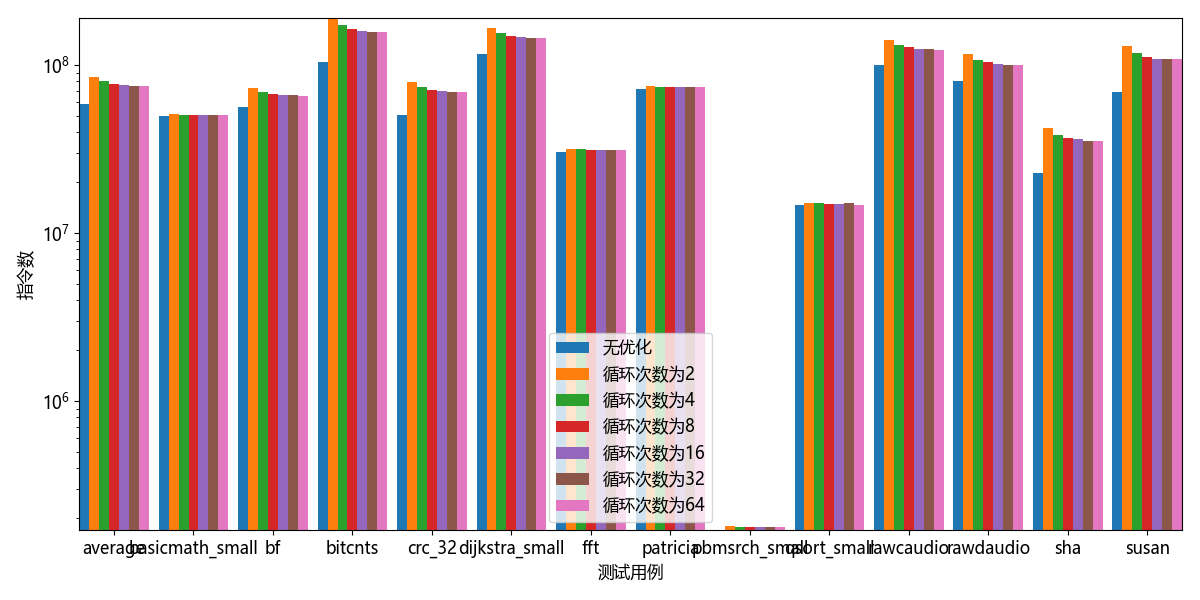

In [74]:
在递归中包含循环指令数图, _ = grouped_bar_chart_from_dataframe(
    loop_iterations_in_recursive_function_benchmark_instruction_counts,
    'instruction_count',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [75]:
在递归中包含循环指令数表 = calculate_increases(
    loop_iterations_in_recursive_function_benchmark_instruction_counts, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}'
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    ],
    'instruction_count'
).rename(english_and_chinese_labels, axis='columns')
在递归中包含循环指令数表

,测试用例,无优化,循环次数为2,循环次数为2增长,循环次数为4,循环次数为4增长,循环次数为8,循环次数为8增长,循环次数为16,循环次数为16增长,循环次数为32,循环次数为32增长,循环次数为64,循环次数为64增长
0,average,5.90e+07,8.54e+07,0.45,7.99e+07,0.36,7.72e+07,0.31,7.58e+07,0.29,7.53e+07,0.28,7.50e+07,2.72e-01
1,basicmath_small,4.97e+07,5.10e+07,0.03,5.07e+07,0.02,5.06e+07,0.02,5.05e+07,0.02,5.05e+07,0.02,5.05e+07,1.63e-02
2,bf,5.62e+07,7.26e+07,0.29,6.90e+07,0.23,6.73e+07,0.20,6.66e+07,0.18,6.62e+07,0.18,6.59e+07,1.72e-01
3,bitcnts,1.04e+08,1.91e+08,0.84,1.74e+08,0.67,1.64e+08,0.59,1.60e+08,0.54,1.57e+08,0.52,1.57e+08,5.18e-01
4,crc_32,5.07e+07,7.88e+07,0.55,7.37e+07,0.45,7.11e+07,0.40,6.98e+07,0.38,6.92e+07,0.36,6.89e+07,3.57e-01
5,dijkstra_small,1.17e+08,1.65e+08,0.42,1.55e+08,0.33,1.50e+08,0.28,1.47e+08,0.26,1.46e+08,0.25,1.45e+08,2.41e-01
6,fft,3.05e+07,3.18e+07,0.04,3.15e+07,0.03,3.14e+07,0.03,3.13e+07,0.03,3.13e+07,0.03,3.13e+07,2.52e-02
7,patricia,7.24e+07,7.49e+07,0.03,7.45e+07,0.03,7.42e+07,0.02,7.40e+07,0.02,7.41e+07,0.02,7.40e+07,2.10e-02
8,pbmsrch_small,1.70e+05,1.81e+05,0.06,1.78e+05,0.05,1.77e+05,0.04,1.77e+05,0.04,1.77e+05,0.04,1.77e+05,4.37e-02
9,qsort_small,1.46e+07,1.51e+07,0.03,1.51e+07,0.03,1.48e+07,0.01,1.48e+07,0.01,1.51e+07,0.03,1.48e+07,9.11e-03


In [76]:
在递归中包含循环指令数表Latex = 在递归中包含循环指令数表.to_latex(
    formatters={
        f'循环次数为{loop_iterations_in_recursive_function}增长': '{:,.2%}'.format
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    },
    columns=['测试用例'] + [f'循环次数为{loop_iterations_in_recursive_function}增长' for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function],
    caption='在递归函数中包含不同迭代次数的循环时不同测试用例的指令数表',
    label='在递归函数中包含不同迭代次数的循环时不同测试用例的指令数表',
    index=False
)
print(在递归中包含循环指令数表Latex)

\begin{table}
\centering
\caption{在递归函数中包含不同迭代次数的循环时不同测试用例的指令数表}
\label{在递归函数中包含不同迭代次数的循环时不同测试用例的指令数表}
\begin{tabular}{lrrrrrr}
\toprule
           测试用例 & 循环次数为2增长 & 循环次数为4增长 & 循环次数为8增长 & 循环次数为16增长 & 循环次数为32增长 & 循环次数为64增长 \\
\midrule
        average &   44.80\% &   35.56\% &   30.87\% &    28.56\% &    27.62\% &    27.22\% \\
basicmath\_small &    2.54\% &    2.05\% &    1.81\% &     1.68\% &     1.63\% &     1.63\% \\
             bf &   29.15\% &   22.88\% &   19.74\% &    18.49\% &    17.86\% &    17.23\% \\
        bitcnts &   83.92\% &   67.50\% &   58.61\% &    54.18\% &    51.92\% &    51.77\% \\
         crc\_32 &   55.30\% &   45.19\% &   40.13\% &    37.60\% &    36.33\% &    35.70\% \\
 dijkstra\_small &   41.74\% &   32.57\% &   28.08\% &    25.84\% &    24.72\% &    24.06\% \\
            fft &    4.11\% &    3.06\% &    2.75\% &     2.61\% &     2.55\% &     2.52\% \\
       patricia &    3.45\% &    2.86\% &    2.38\% &     2.11\% &     2.22\% &     2.10\% \\
  pbmsrch\_

### 损耗均衡的有效性

#### 栈上最热内存地址的写次数

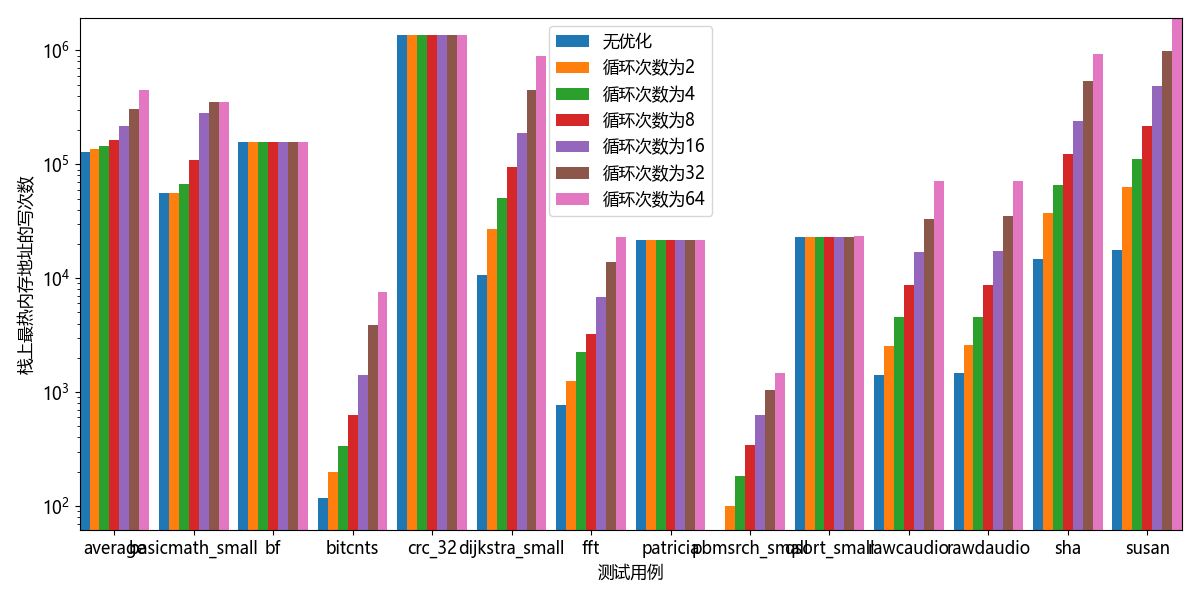

In [77]:
在递归中包含循环栈上最热内存地址的写次数图, _ = grouped_bar_chart_from_dataframe(
    loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses,
    'writes_on_hottest_stack_address',
    'benchmark',
    'executable_type',
    '',
    replace_label,
    log=True
)

In [78]:
在递归中包含循环栈上最热内存地址的写次数表 = calculate_increases(
    loop_iterations_in_recursive_function_benchmark_writes_on_hottest_stack_addresses, 
    'new_loop2recursion',
    [
        f'new_loop2recursion-loop_iterations-{loop_iterations_in_recursive_function}'
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    ],
    'writes_on_hottest_stack_address'
).rename(english_and_chinese_labels, axis='columns')

在递归中包含循环栈上最热内存地址的写次数表

,测试用例,无优化,循环次数为2,循环次数为2增长,循环次数为4,循环次数为4增长,循环次数为8,循环次数为8增长,循环次数为16,循环次数为16增长,循环次数为32,循环次数为32增长,循环次数为64,循环次数为64增长
0,average,1.29e+05,1.35e+05,5.18e-02,1.44e+05,1.22e-01,1.64e+05,2.77e-01,2.16e+05,6.79e-01,3.06e+05,1.38e+00,4.51e+05,2.50
1,basicmath_small,5.60e+04,5.61e+04,1.86e-03,6.76e+04,2.07e-01,1.09e+05,9.43e-01,2.84e+05,4.06e+00,3.51e+05,5.27e+00,3.54e+05,5.32
2,bf,1.56e+05,1.56e+05,0.00e+00,1.56e+05,0.00e+00,1.56e+05,0.00e+00,1.56e+05,0.00e+00,1.56e+05,0.00e+00,1.56e+05,0.00
3,bitcnts,1.18e+02,2.00e+02,6.95e-01,3.33e+02,1.82e+00,6.30e+02,4.34e+00,1.40e+03,1.09e+01,3.89e+03,3.19e+01,7.64e+03,63.73
4,crc_32,1.37e+06,1.37e+06,0.00e+00,1.37e+06,0.00e+00,1.37e+06,0.00e+00,1.37e+06,0.00e+00,1.37e+06,0.00e+00,1.37e+06,0.00
5,dijkstra_small,1.07e+04,2.69e+04,1.52e+00,5.05e+04,3.73e+00,9.41e+04,7.81e+00,1.88e+05,1.66e+01,4.51e+05,4.12e+01,9.00e+05,83.32
6,fft,7.76e+02,1.24e+03,5.98e-01,2.23e+03,1.88e+00,3.24e+03,3.18e+00,6.88e+03,7.87e+00,1.38e+04,1.68e+01,2.32e+04,28.93
7,patricia,2.18e+04,2.18e+04,0.00e+00,2.18e+04,0.00e+00,2.18e+04,0.00e+00,2.18e+04,0.00e+00,2.18e+04,0.00e+00,2.18e+04,0.00
8,pbmsrch_small,6.10e+01,9.90e+01,6.23e-01,1.83e+02,2.00e+00,3.40e+02,4.57e+00,6.28e+02,9.30e+00,1.03e+03,1.60e+01,1.46e+03,22.90
9,qsort_small,2.30e+04,2.30e+04,-5.22e-04,2.30e+04,8.70e-05,2.30e+04,1.30e-03,2.31e+04,3.74e-03,2.32e+04,8.78e-03,2.34e+04,0.02


In [79]:
在递归中包含循环栈上最热内存地址的写次数表Latex = 在递归中包含循环栈上最热内存地址的写次数表.to_latex(
    formatters={
        f'循环次数为{loop_iterations_in_recursive_function}增长': '{:,.2%}'.format
        for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function
    },
    columns=['测试用例'] + [f'循环次数为{loop_iterations_in_recursive_function}增长' for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions if loop_iterations_in_recursive_function],
    caption='在递归函数中包含不同迭代次数的循环时不同测试用例栈上最热内存地址的写次数表',
    label='在递归函数中包含不同迭代次数的循环时不同测试用例栈上最热内存地址的写次数表',
    index=False
)
print(在递归中包含循环栈上最热内存地址的写次数表Latex)

\begin{table}
\centering
\caption{在递归函数中包含不同迭代次数的循环时不同测试用例栈上最热内存地址的写次数表}
\label{在递归函数中包含不同迭代次数的循环时不同测试用例栈上最热内存地址的写次数表}
\begin{tabular}{lrrrrrr}
\toprule
           测试用例 & 循环次数为2增长 & 循环次数为4增长 &  循环次数为8增长 & 循环次数为16增长 & 循环次数为32增长 &  循环次数为64增长 \\
\midrule
        average &    5.18\% &   12.24\% &    27.68\% &    67.92\% &   137.89\% &    250.47\% \\
basicmath\_small &    0.19\% &   20.71\% &    94.31\% &   406.32\% &   527.37\% &    531.60\% \\
             bf &    0.00\% &    0.00\% &     0.00\% &     0.00\% &     0.00\% &      0.00\% \\
        bitcnts &   69.49\% &  182.20\% &   433.90\% & 1,088.14\% & 3,194.92\% &  6,372.88\% \\
         crc\_32 &    0.00\% &    0.00\% &     0.00\% &     0.00\% &     0.00\% &      0.00\% \\
 dijkstra\_small &  152.21\% &  372.76\% &   781.07\% & 1,660.62\% & 4,124.89\% &  8,331.87\% \\
            fft &   59.79\% &  187.50\% &   317.78\% &   787.11\% & 1,675.52\% &  2,893.17\% \\
       patricia &    0.00\% &    0.00\% &     0.00\% &     0.00\% &     0

## 总结

In [80]:
recursion_depth_limit_writes_on_hottest_stack_address_increases = []
recursion_depth_limit_max_stack_usage_increases = []

限制不同的递归深度栈上最热内存地址的写次数平均增长 = 限制不同的递归深度栈上最热内存地址的写次数表[
    限制不同的递归深度栈上最热内存地址的写次数表['测试用例'] == 'average'
]

限制不同的递归深度栈区内存的使用量平均增长 = 限制不同的递归深度栈区内存的使用量表[
    限制不同的递归深度栈区内存的使用量表['测试用例'] == 'average'
]

for recursion_depth_limit in recursion_depth_limits:
    if recursion_depth_limit:
        recursion_depth_limit_writes_on_hottest_stack_address_increases.extend(
            限制不同的递归深度栈上最热内存地址的写次数平均增长[
                f'递归深度为{recursion_depth_limit}增长'
            ]
        )
        recursion_depth_limit_max_stack_usage_increases.extend(
            限制不同的递归深度栈区内存的使用量平均增长[
                f'递归深度为{recursion_depth_limit}增长'
            ]
        )

recursion_depth_limit_writes_on_hottest_stack_address_increases = np.array(recursion_depth_limit_writes_on_hottest_stack_address_increases)
recursion_depth_limit_max_stack_usage_increases = np.array(recursion_depth_limit_max_stack_usage_increases)

In [81]:
loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases = []
loop_iterations_in_recursive_function_max_stack_usage_increases = []

在递归中包含循环栈上最热内存地址的写次数平均增长 = 在递归中包含循环栈上最热内存地址的写次数表[
    在递归中包含循环栈上最热内存地址的写次数表['测试用例'] == 'average'
]

在递归中包含循环栈区内存的使用量平均增长 = 在递归中包含循环栈区内存的使用量表[
    在递归中包含循环栈区内存的使用量表['测试用例'] == 'average'
]

for loop_iterations_in_recursive_function in loop_iterations_in_recursive_functions:
    if loop_iterations_in_recursive_function:
        loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases.extend(
            在递归中包含循环栈上最热内存地址的写次数平均增长[
                f'循环次数为{loop_iterations_in_recursive_function}增长'
            ]
        )
        loop_iterations_in_recursive_function_max_stack_usage_increases.extend(
            在递归中包含循环栈区内存的使用量平均增长[
                f'循环次数为{loop_iterations_in_recursive_function}增长'
            ]
        )

loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases = np.array(loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases)
loop_iterations_in_recursive_function_max_stack_usage_increases = np.array(loop_iterations_in_recursive_function_max_stack_usage_increases)

In [82]:
from regression import regression

In [83]:
def g(x, a, b, c):
    return a * np.exp(-b * x) + c

In [84]:
loop_iterations_in_recursive_function_parameter_values, loop_iterations_in_recursive_function_r_squared = regression(
    g,
    loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases,
    loop_iterations_in_recursive_function_max_stack_usage_increases,
)

In [85]:
loop_iterations_in_recursive_function_g = '%.4f * exp(-%.4f * x) + %.4f, r^2 = %.4f' % (*loop_iterations_in_recursive_function_parameter_values, loop_iterations_in_recursive_function_r_squared)
loop_iterations_in_recursive_function_g

'1.5642 * exp(-9.4009 * x) + -0.7742, r^2 = 0.9847'

In [86]:
recursion_depth_limit_parameter_values, recursion_depth_limit_r_squared = regression(
    g,
    recursion_depth_limit_writes_on_hottest_stack_address_increases,
    recursion_depth_limit_max_stack_usage_increases,
)

In [87]:
recursion_depth_limit_g = '%.4f * exp(-%.4f * x) + %.4f, r^2 = %.4f' % (*recursion_depth_limit_parameter_values, recursion_depth_limit_r_squared)
recursion_depth_limit_g

'-2.1495 * exp(--0.0005 * x) + 1.2895, r^2 = 0.6813'

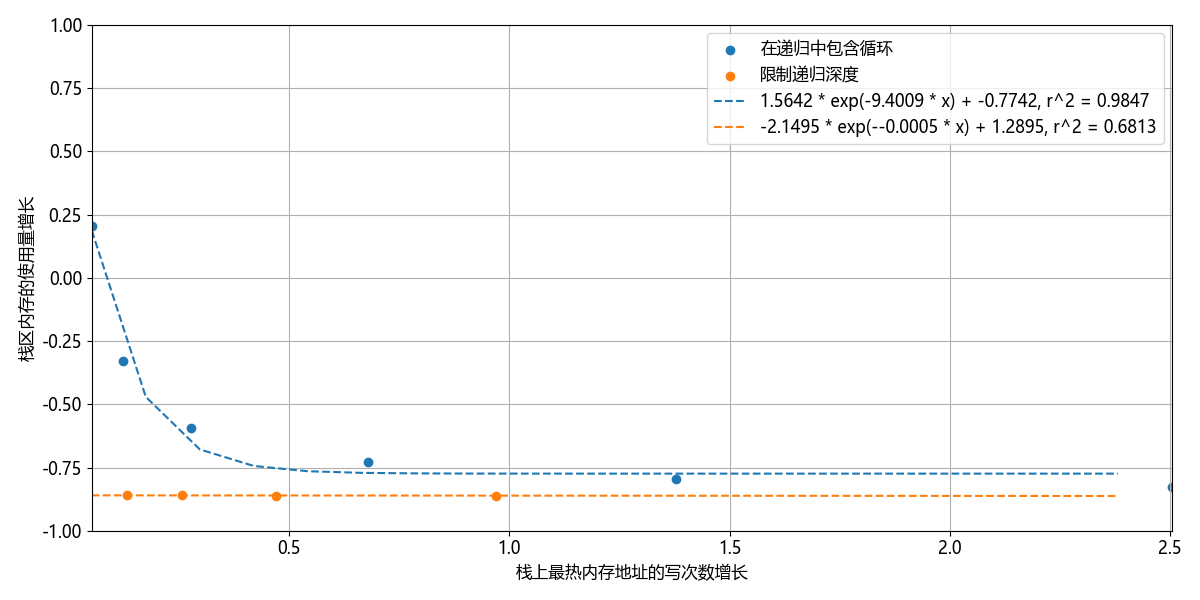

In [88]:
x_start = min(
    min(recursion_depth_limit_writes_on_hottest_stack_address_increases),
    min(loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases)
)

x_stop = max(
    max(recursion_depth_limit_writes_on_hottest_stack_address_increases),
    max(loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases)
)

x = np.arange(x_start, x_stop, (x_stop - x_start) / 20)

predicted_loop_iterations_in_recursive_function_max_stack_usage_increases = g(x, *loop_iterations_in_recursive_function_parameter_values)

predicted_recursion_depth_limit_max_stack_usage_increases = g(x, *recursion_depth_limit_parameter_values)

fig, ax = plt.subplots()

ax.scatter(
    np.array(loop_iterations_in_recursive_function_writes_on_hottest_stack_address_increases),
    np.array(loop_iterations_in_recursive_function_max_stack_usage_increases),
    label='在递归中包含循环'
)

ax.scatter(
    np.array(recursion_depth_limit_writes_on_hottest_stack_address_increases),
    np.array(recursion_depth_limit_max_stack_usage_increases),
    label='限制递归深度'
)

ax.plot(x, predicted_loop_iterations_in_recursive_function_max_stack_usage_increases, linestyle='dashed', label=loop_iterations_in_recursive_function_g)
ax.plot(x, predicted_recursion_depth_limit_max_stack_usage_increases, linestyle='dashed', label=recursion_depth_limit_g)


ax.set_xlabel('栈上最热内存地址的写次数增长')
ax.set_ylabel('栈区内存的使用量增长')

ax.set_ylim([-1, 1])
ax.legend()
ax.grid(True)